In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns

2025-07-23 12:19:00.903731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753273141.200144      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753273141.289982      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


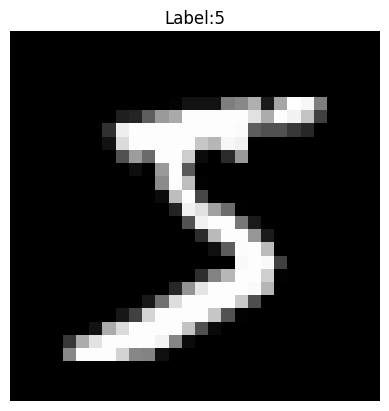

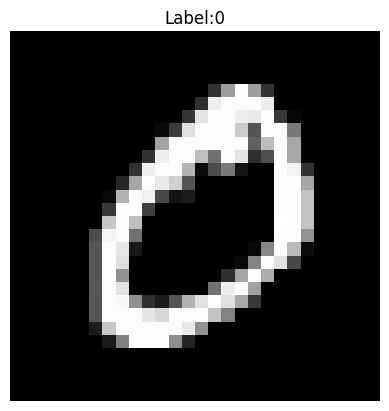

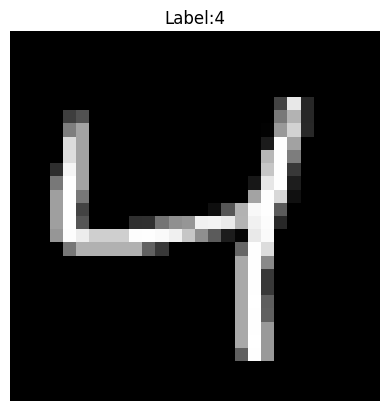

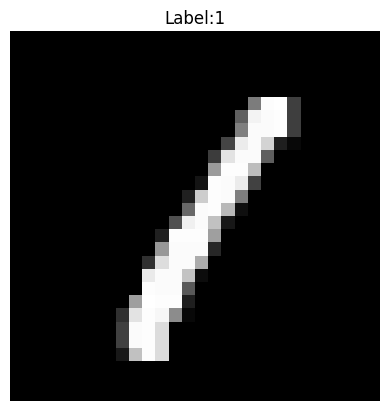

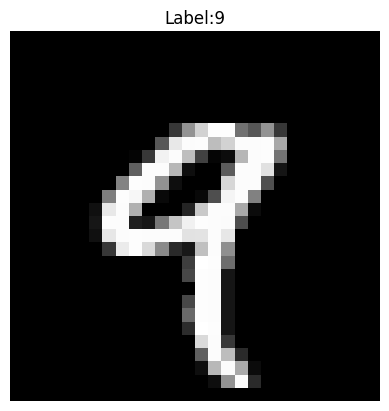

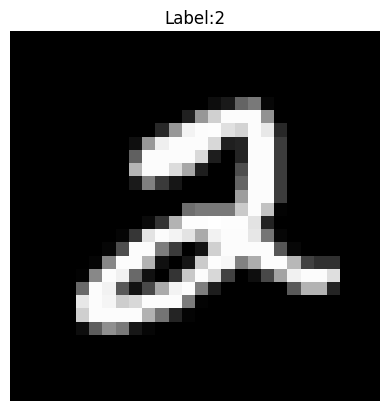

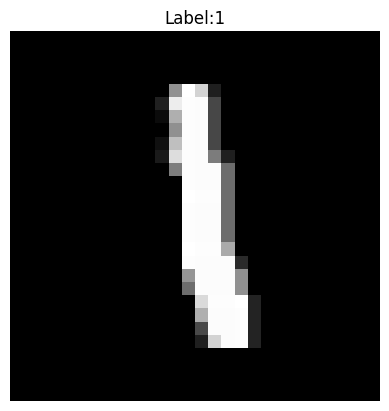

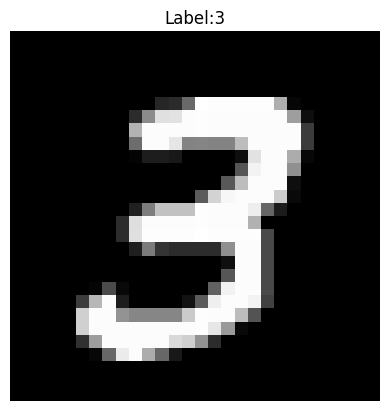

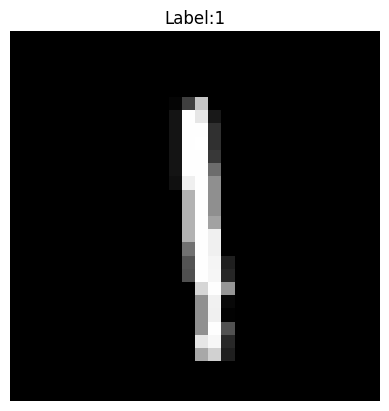

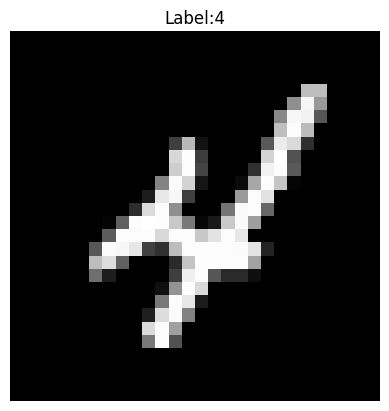

In [3]:
for i in range(10):
    plt.imshow(x_train[i],cmap="gray")
    plt.title(f"Label:{y_train[i]}")
    plt.axis("off")
    plt.show()

In [4]:
print("x_train shape:", x_train.shape) 
print("y_train shape:", y_train.shape) 

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


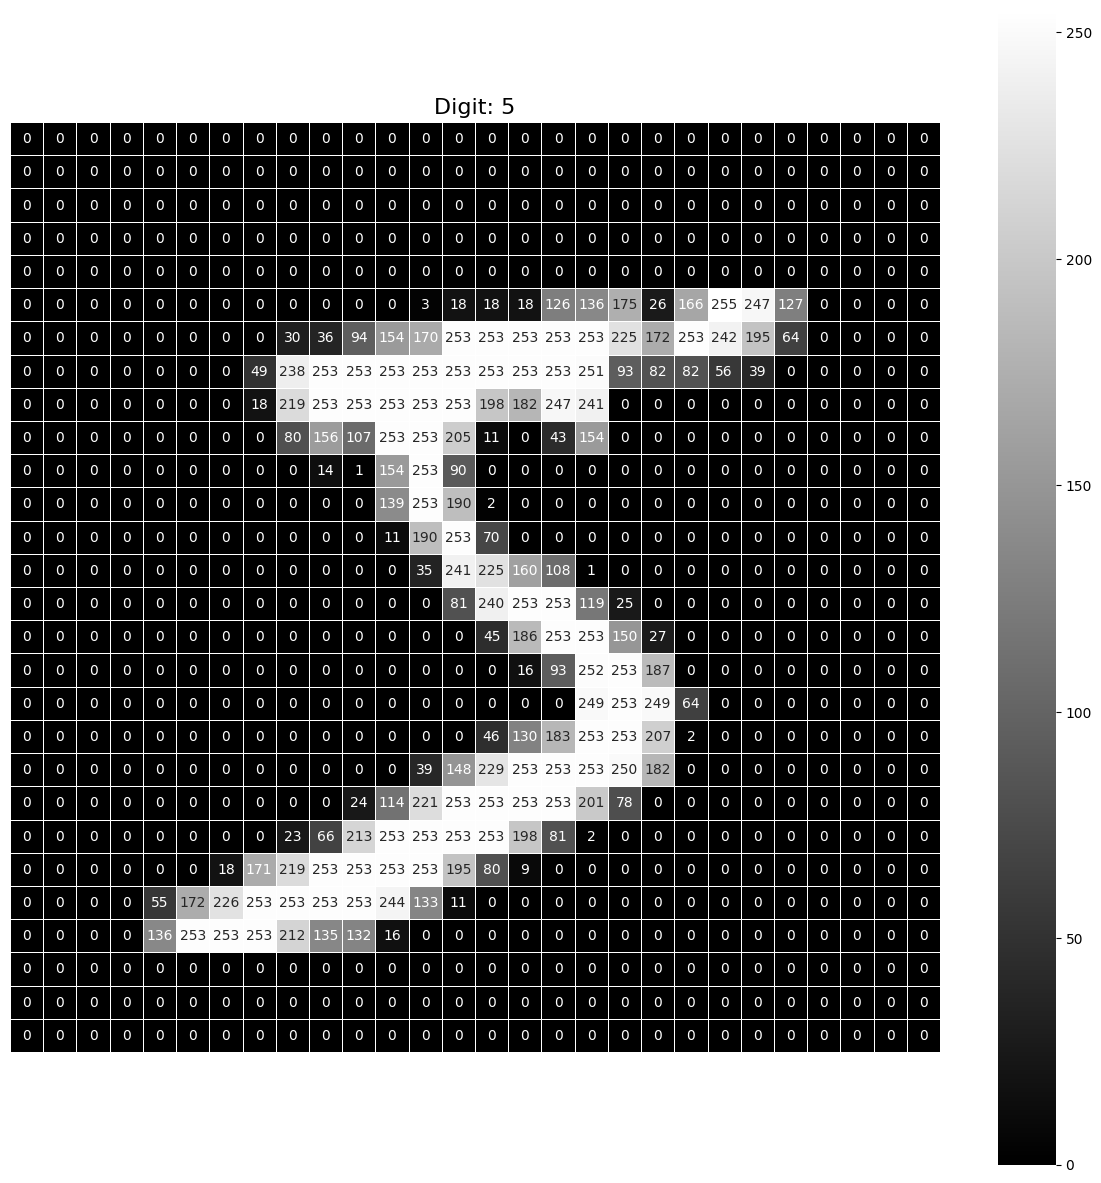

In [5]:
plt.figure(figsize=(15,15 ))
sns.heatmap(x_train[0], annot=True, fmt="d", cmap="gray", cbar=True,
            linewidths=0.5, linecolor='white', square=True)
plt.title(f"Digit: {y_train[0]}", fontsize=16)
plt.axis('off')
plt.show()

The x_train and x_test is normalized with in the range 0 to 1 from 0 to 255

In [6]:
x_train_flatten=x_train.reshape(-1,784).astype("float32")/255.0
x_test_flatten=x_test.reshape(-1,784).astype("float32")/255.0

In [7]:
y_train_binary = y_train % 2
y_test_binary = y_test % 2

In [8]:
model =keras.Sequential([
    keras.layers.Dense(1,input_shape=(784,),activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-23 12:19:25.649308: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(x_train_flatten,y_train_binary,epochs=20)



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8193 - loss: 0.3923
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8898 - loss: 0.2742
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8951 - loss: 0.2657
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.2578
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8993 - loss: 0.2565
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8973 - loss: 0.2615
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8998 - loss: 0.2548
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9002 - loss: 0.2545
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9004 - loss: 0.2535
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9003 - loss: 0.2529
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8991 - loss: 0.2544
Epoch 12/20
1875/1875 ━━━━━━━━

In [11]:
model.evaluate(x_test_flatten, y_test_binary)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.2672


[0.25577598810195923, 0.9021000266075134]